In [19]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
dataset = pd.read_csv('../data/dataset_total_smells.csv', delimiter=',', index_col=0)
print(dataset.shape)

dataset.head()

,name,link,path,commits,TooManyMethods,ExcessiveMethodLength,ExcessiveClassLength,DataClass,ExcessiveParameterList
id,,,,,,,,,
0,hidroh/materialistic,https://github.com/hidroh/materialistic,repositories/materialistic,1716,39,1,0,4,0
1,gsantner/memetastic,https://github.com/gsantner/memetastic,repositories/memetastic,230,9,1,0,8,0
2,fenimore/DemocracyDroid,https://github.com/fenimore/DemocracyDroid,repositories/DemocracyDroid,425,1,0,0,2,0
3,ctodobom/OpenNoteScanner,https://github.com/ctodobom/OpenNoteScanner,repositories/OpenNoteScanner,194,3,4,2,3,0
4,HugoGresse/Anecdote,https://github.com/HugoGresse/Anecdote,repositories/Anecdote,308,4,0,0,3,0


<Figure size 1800x720 with 0 Axes>

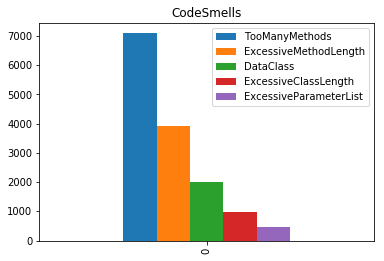

Repositories:  649
Total of Code Smells:  14496
Average Code Smells per Repository:  22.335901386748844


In [36]:
Numbers = {'TooManyMethods': [dataset['TooManyMethods'].sum()],
           'ExcessiveMethodLength': [dataset['ExcessiveMethodLength'].sum()],
           'DataClass': [dataset['DataClass'].sum()],
           'ExcessiveClassLength': [dataset['ExcessiveClassLength'].sum()],
           'ExcessiveParameterList': [dataset['ExcessiveParameterList'].sum()]
           }
dataframe_numbers = pd.DataFrame(Numbers, index=None)
dataframe_numbers.head()
plt.figure(figsize=(25,10))
dataframe_numbers.plot(kind='bar',title='CodeSmells')
plt.show()
print("Repositories: ", dataset["name"].count())
columns = ['TooManyMethods', 'ExcessiveMethodLength', 'DataClass', 'ExcessiveClassLength', 'ExcessiveParameterList']
total_code_smells = sum([dataset[l].sum() for l in columns])
print("Total of Code Smells: ", total_code_smells)
print("Average Code Smells per Repository: ", total_code_smells/dataset["name"].count())

<Figure size 1800x720 with 0 Axes>

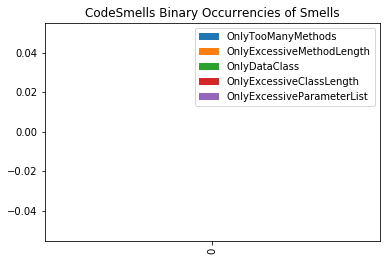

In [43]:
def bin_occ(df, label):
    count = 0
    for index, row in df.iterrows():
        bin_occ = False
        if row[label] > 0:
            ok = True
        for label_others in columns:
            if row[label_others] > 0:
                bin_occ = False
                break
        if bin_occ:
            count += 1
    return count
            
Binary_occurrencies = {'OnlyTooManyMethods': [bin_occ(dataset, 'TooManyMethods')],
                       'OnlyExcessiveMethodLength': [bin_occ(dataset, 'ExcessiveMethodLength')],
                       'OnlyDataClass': [bin_occ(dataset, 'DataClass')],
                       'OnlyExcessiveClassLength': [bin_occ(dataset, 'ExcessiveClassLength')],
                       'OnlyExcessiveParameterList': [bin_occ(dataset, 'ExcessiveParameterList')]
                      }
dataframe_bin_occ = pd.DataFrame(Binary_occurrencies, index=None)
dataframe_bin_occ.head()
plt.figure(figsize=(25,10))
dataframe_bin_occ.plot(kind='bar',title='CodeSmells Binary Occurrencies of Smells')
plt.show()

<Figure size 1800x720 with 0 Axes>

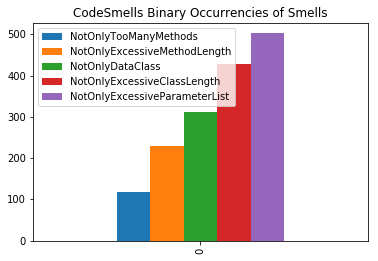

In [47]:
def inv_bin_occ(df, label):
    count = 0
    for index, row in df.iterrows():
        if row[label] == 0:
            count += 1
    return count
            
Inverse_Binary_occurrencies = {'NotOnlyTooManyMethods': [inv_bin_occ(dataset, 'TooManyMethods')],
                       'NotOnlyExcessiveMethodLength': [inv_bin_occ(dataset, 'ExcessiveMethodLength')],
                       'NotOnlyDataClass': [inv_bin_occ(dataset, 'DataClass')],
                       'NotOnlyExcessiveClassLength': [inv_bin_occ(dataset, 'ExcessiveClassLength')],
                       'NotOnlyExcessiveParameterList': [inv_bin_occ(dataset, 'ExcessiveParameterList')]
                      }
dataframe_bin_occ = pd.DataFrame(Inverse_Binary_occurrencies, index=None)
dataframe_bin_occ.head()
plt.figure(figsize=(25,10))
dataframe_bin_occ.plot(kind='bar',title='CodeSmells Binary Occurrencies of Smells')
plt.show()

# Stratified dataset splitting
## Balance train and test set by:
- classes frequency
- commits
- lines of code (retrieve this info)

In [42]:
def prepare_dataset_bin(class_):
    for 
for class_ in columns:
    print("Preparing class", class_)
    

Preparing class TooManyMethods
Preparing class ExcessiveMethodLength
Preparing class DataClass
Preparing class ExcessiveClassLength
Preparing class ExcessiveParameterList


# visualizing data

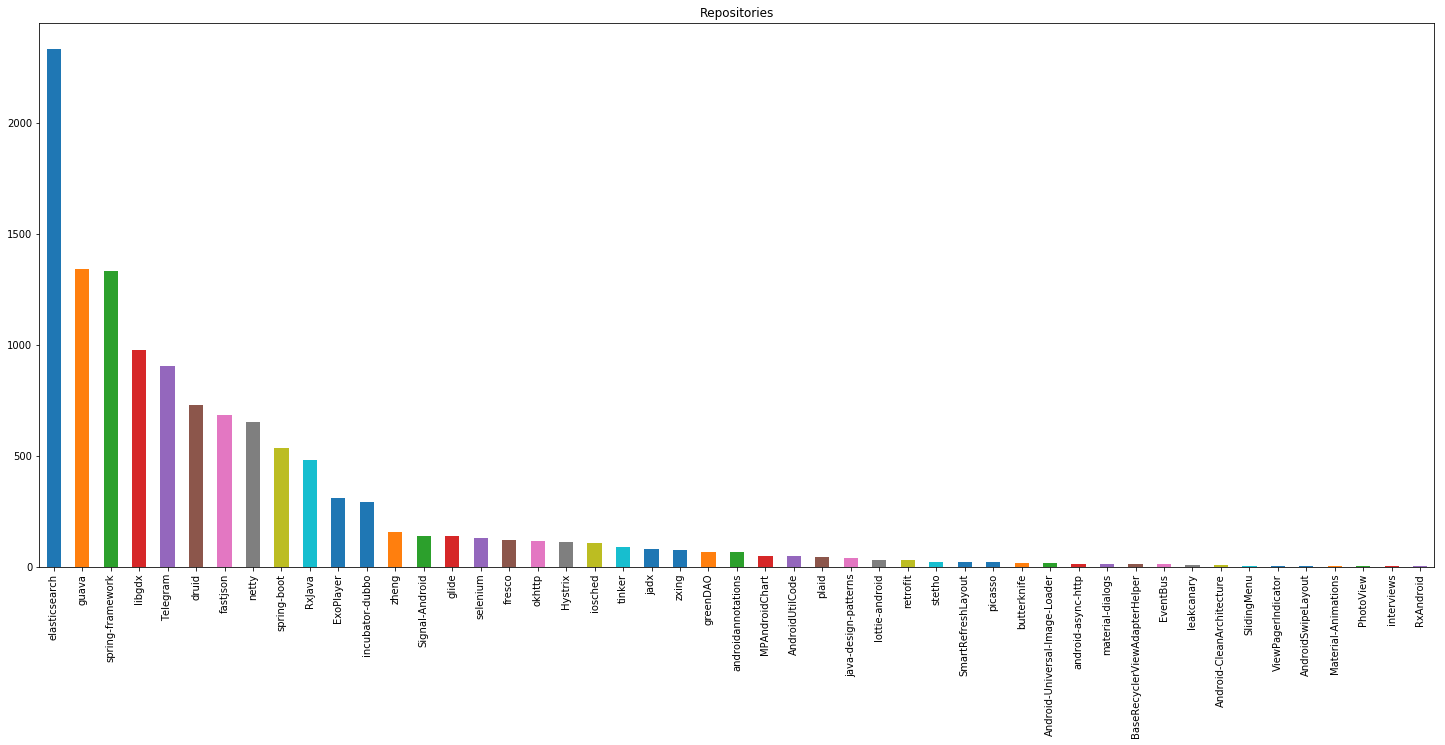

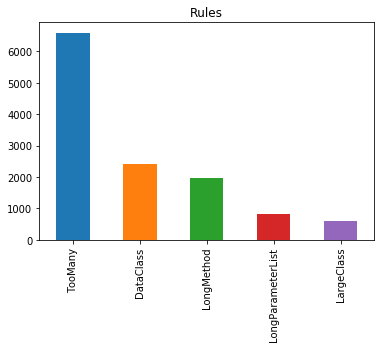

In [8]:
plt.figure(figsize=(25,10))
dataset['TooManyMethods'].value_counts().plot(kind='bar',title='TooManyMethods')
plt.show()
dataset['ExcessiveClassLength'].value_counts().plot(kind='bar',title='ExcessiveClassLength')
plt.show()

# pre-processing
### calling AST transforming